In [16]:
# PyWavelets - Wavelet Transforms in Python — PyWavelets Documentation
import pywt
import cv2
import numpy as np
from pywt import dwt2, idwt2, cwt
import matplotlib.pyplot as plt#用于显示图片

In [4]:
##################################################################################
############################遍历图像，将高频点置0#################################
##################################################################################
def tool_Denoising(inputGrayPic,value):
    result = inputGrayPic

    height = result.shape[0]
    weight = result.shape[1]

    for row in range(height):
        for col in range(weight):
            result[row, col]
            if (abs(result[row, col]) > value):
#                 print(abs(result[row, col]))
                result[row, col] = 0#频率的数值0为低频
    return result

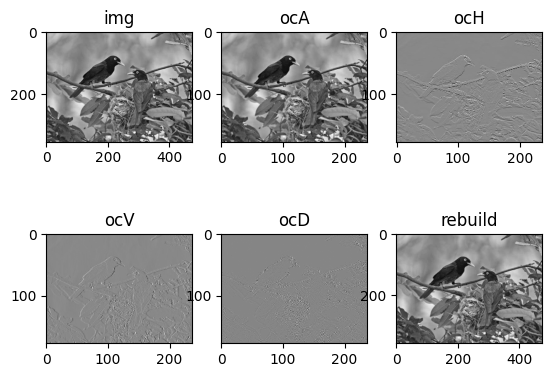

In [14]:
#读取灰度图
img = cv2.imread('./OIP-C.jpg',0)

#cA，cH,cV,cD 分别为近似分量(低频分量)、水平细节分量、垂直细节分量和对角细节分量
cA,(cH,cV,cD)=dwt2(img,'haar')#dwt2函数第二个参数指定小波基

plt.subplot(231), plt.imshow(img, 'gray'), plt.title('img')
plt.subplot(232), plt.imshow(cA, 'gray'), plt.title('ocA')
plt.subplot(233), plt.imshow(cH, 'gray'), plt.title('ocH')
plt.subplot(234), plt.imshow(cV, 'gray'), plt.title('ocV')
plt.subplot(235), plt.imshow(cD, 'gray'), plt.title('ocD')
plt.subplot(236), plt.imshow(rebuild, 'gray'), plt.title('rebuild')
plt.show()

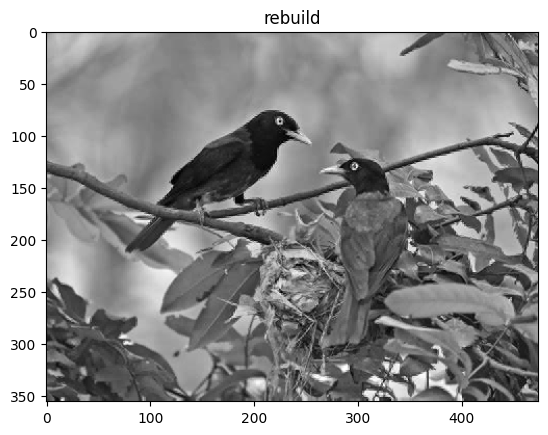

In [18]:
#设置去噪阈值。因为噪音一般都是高频信息，遍历像素，将VALUE的像素点置0
VALUE = 60
#处理低频
# cA = tool_Denoising(cA,100)
#处理水平高频
cH = tool_Denoising(cH,VALUE)
#处理垂直高频
cV = tool_Denoising(cV,VALUE)
#处理对角线高频
cD = tool_Denoising(cD,VALUE)
#重构图像
rebuild1 = idwt2((cA,(cH,cV,cD)), 'haar')

plt.subplot(111), plt.imshow(rebuild1, 'gray'), plt.title('rebuild')
plt.show()

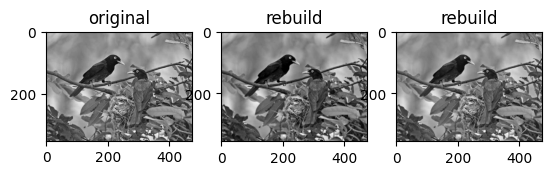

In [24]:
# 通过pywt.threshold 的方式实现去噪
# cA,(cH,cV,cD)=dwt2(img,'haar')#dwt2函数第二个参数指定小波基
cA = pywt.threshold(cA, 6)
cH = pywt.threshold(cH, 6)
cV = pywt.threshold(cV, 6)
cD = pywt.threshold(cD, 6)

rebuild2 = idwt2((cA,(cH,cV,cD)), 'haar')
plt.subplot(131), plt.imshow(img, 'gray'), plt.title('original')
plt.subplot(132), plt.imshow(rebuild2, 'gray'), plt.title('rebuild')
plt.subplot(133), plt.imshow(rebuild1, 'gray'), plt.title('rebuild')
plt.savefig("img.png")


## 基于边缘的图像分割

(<AxesSubplot: >, <matplotlib.image.AxesImage at 0x7f0bb76b4ca0>)

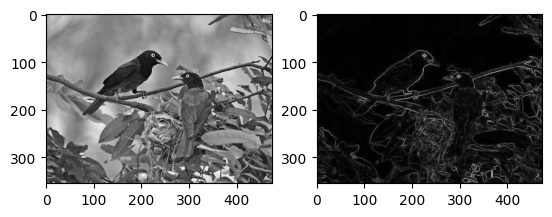

In [28]:
# Reference: https://blog.csdn.net/AI_girl/article/details/114899815
#roberts算子
kernelx = np.array([[-1, 0], [0, 1]], dtype= int)
kernely = np.array([[0, -1], [1, 0]], dtype= int)
x = cv2.filter2D(img, cv2.CV_16S, kernelx)
y = cv2.filter2D(img, cv2.CV_16S, kernely)

#转uint8
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)

#加权和
Roberts = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

plt.subplot(1, 2, 1), plt.imshow(img, 'gray')
plt.subplot(1, 2, 2), plt.imshow(Roberts, 'gray')

## 基于轮廓的分割